In [260]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [261]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [262]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [263]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [264]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Figure size 640x480 with 0 Axes>

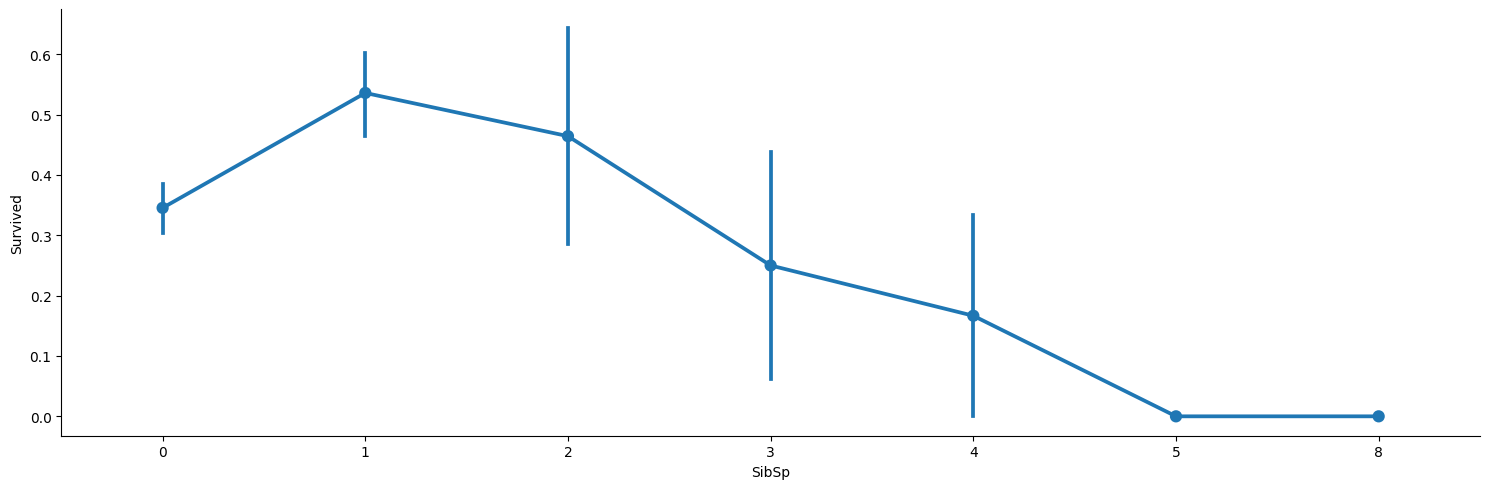

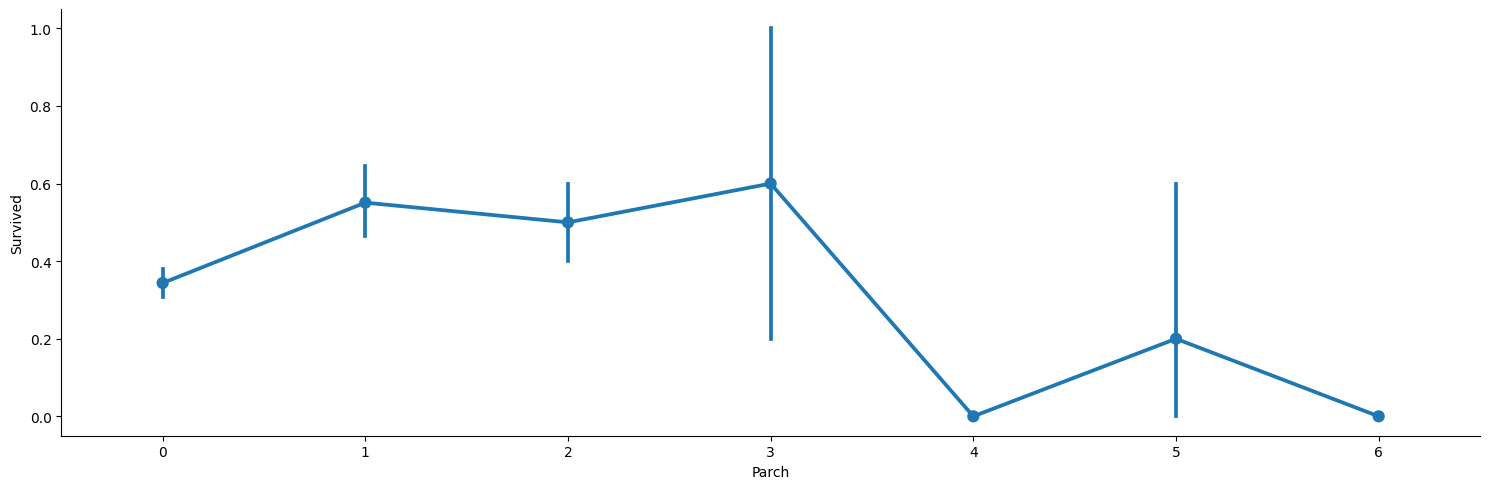

In [265]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=3)

In [266]:
titanic['family'] = titanic['SibSp'] + titanic['Parch']

In [267]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

### How to Save as

In [268]:
# save as to csv
#titanic.to_csv('titanic2.csv', index=False)

In [269]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [270]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [271]:
gender_num = {'male':0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(gender_num)

In [272]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [273]:
titanic.head(3)

,Survived,Pclass,Sex,Age,Fare,family,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0


### How to save as

In [274]:
# save as to csv
#titanic.to_csv('titanic2.csv', index=False)

In [275]:
titanic.drop(index=890,axis=0, inplace=True)

In [276]:
features = titanic.drop('Survived', axis=1)
label = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size= 0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [277]:
print(len(label),len(features), len(y_train), len(y_test), len(y_val))

890 890 534 178 178


In [278]:
X_train.to_csv('X_train_feautures.csv')
X_test.to_csv('X_test_feautures.csv')
X_val.to_csv('X_val_feautures.csv')

y_train.to_csv('y_train_label.csv')
y_test.to_csv('y_test_label.csv')
y_val.to_csv('y_val_label.csv')

In [279]:
train_features = pd.read_csv('X_train_feautures.csv')
train_labels = pd.read_csv('y_train_label.csv')

In [280]:
rf = RandomForestClassifier(n_estimators=5, max_depth=10)

In [281]:
# here I'll create a cross with 5 division 
# for transforme a colum vector in an array i'll use .values.ravel()
cross_score = cross_val_score(estimator=rf, X=train_features ,y=train_labels , cv=5)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 108, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 666, in score
    return accuracy_score(y, se

In [282]:
cross_score

array([nan, nan, nan, nan, nan])

In [283]:
def print_results(results):
    print(f'Best Params {results.best_params_}')
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(mean, (std*2), params)

In [284]:
parameters = {
    'n_estimators' :[5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

In [290]:
cv = GridSearchCV(rf , parameters, cv= 5)
cv.fit(train_features, train_labels.values)
cv

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accu

In [288]:
rf.fit(train_features, train_labels)


RandomForestClassifier(max_depth=10, n_estimators=5)